In [3]:
import psycopg2 as psy

try:
    connection = psy.connect(user="student",
                             password="JvLda93aA",
                             host="158.160.52.106",
                             port="5432",
                             database="postgres")
    cursor = connection.cursor()
    visit_query = """
    select cl.client_rk cl_id, cl.visit_dttm visit_date from msu_analytics.client cl
    """
    reg_query = """
    select ac.client_rk cl_id, ac.registration_dttm reg_date from msu_analytics.account ac
    """
    app_query = """
    select ap.game_rk game_id, ap.application_dttm app_date, ap.account_rk ac_id from msu_analytics.application ap
    """
    game_query = """
    select g.game_rk game_id, g.game_dttm game_date, g.game_flg game_start, g.finish_flg game_end from msu_analytics.game g
    """
    cursor.execute(visit_query)
    visit = cursor.fetchall()
    cursor.execute(reg_query)
    reg = cursor.fetchall()
    cursor.execute(app_query)
    app = cursor.fetchall()
    cursor.execute(game_query)
    game = cursor.fetchall()
except Exception as e:
    print(f"Exception {e} hapenned")
finally:
    if connection:
        cursor.close()
        connection.close()

In [4]:
import pandas as pd

visit = pd.DataFrame(visit)
reg = pd.DataFrame(reg)
app = pd.DataFrame(app)
game = pd.DataFrame(game)

In [5]:
visit.columns = ["client_id", "visit_date"]
reg.columns = ["client_id", "registration_date"]
app.columns = ["game_id", "app_date", "account_id"]
game.columns = ["game_id", "game_date", "start", "end"]

In [6]:
visit.visit_date = pd.to_datetime(visit.visit_date) - pd.to_timedelta(1, unit='m')
visit_per_month = visit.groupby([pd.Grouper(key='visit_date', freq='M')]).count()

reg.registration_date = pd.to_datetime(reg.registration_date) - pd.to_timedelta(1, unit='m')
reg_per_month = reg.groupby([pd.Grouper(key='registration_date', freq='M')]).count()

app.app_date = pd.to_datetime(app.app_date) - pd.to_timedelta(1, unit='m')
app_per_month = app.groupby([pd.Grouper(key='app_date', freq='M')]).count()

game.game_date = pd.to_datetime(game.game_date) - pd.to_timedelta(1, unit='m')
game_per_month = game[game.start == 1].groupby([pd.Grouper(key='game_date', freq='M')]).count()

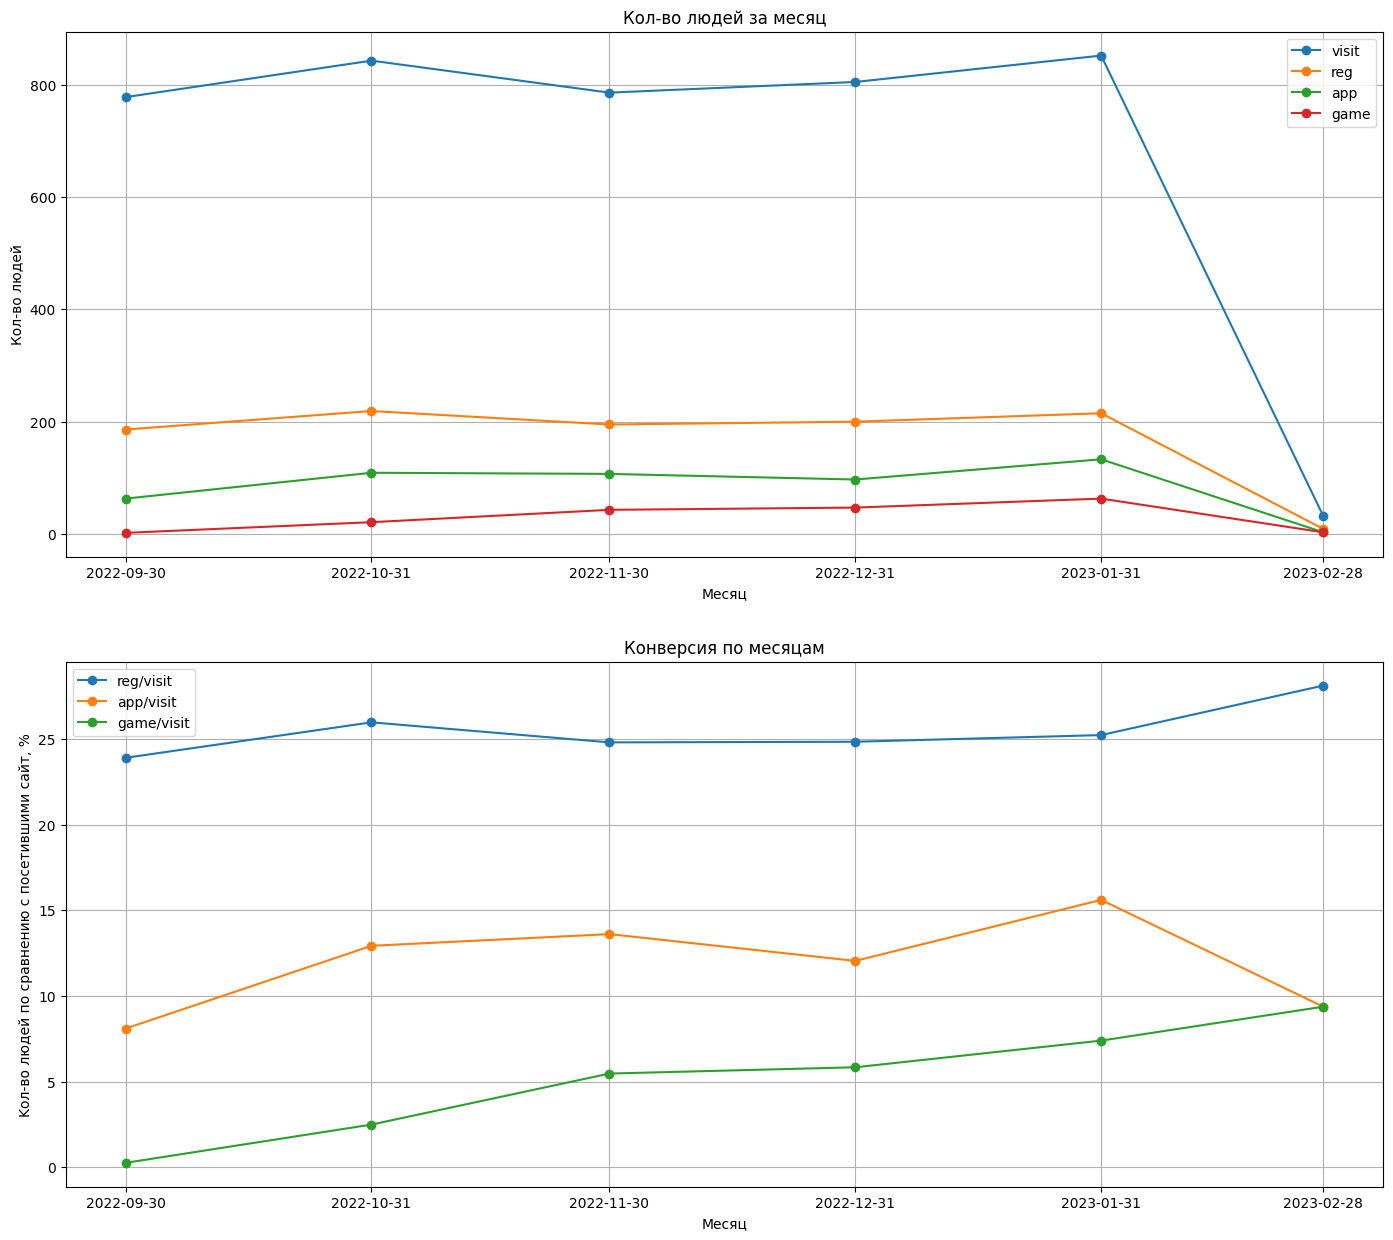

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(nrows=2, figsize=(17,15))
ax[0].set_xticks(reg_per_month.index)
ax[1].set_xticks(reg_per_month.index)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax[0].plot(visit_per_month.index, visit_per_month, marker='o', label='visit')
ax[0].plot(reg_per_month.index, reg_per_month, marker='o', label="reg")
ax[0].plot(app_per_month.index, app_per_month.iloc[:, 1].to_numpy(), marker='o', label="app")
ax[0].plot(game_per_month.index, game_per_month.iloc[:, 1].to_numpy(), marker='o', label="game")

ax[0].set_title("Кол-во людей за месяц")
ax[0].set(xlabel="Месяц", ylabel="Кол-во людей")
ax[0].legend()
ax[0].grid()

ax[1].plot(reg_per_month.index, reg_per_month / visit_per_month * 100, marker='o', label="reg/visit")
ax[1].plot(app_per_month.index, (app_per_month.to_numpy() / visit_per_month.to_numpy())[:,1] * 100, marker='o',  label="app/visit")
ax[1].plot(game_per_month.index, np.diag(game_per_month.iloc[:,1].to_numpy() / visit_per_month.to_numpy()) * 100, marker='o', label="game/visit")

ax[1].set_title("Конверсия по месяцам")
ax[1].set(xlabel="Месяц", ylabel="Kол-во людей по сравнению с посетившими сайт, %")
ax[1].legend()
ax[1].grid()

plt.show()

#visit - кол-во людей, поситивших сайт
#reg - кол-во людей, зарегестрировавшихся на сайте
#app - кол-во людей, подавших заявку на игру
#game - кол-во людей, пришедших на игру

In [8]:
visit.visit_date = pd.to_datetime(visit.visit_date) - pd.to_timedelta(7, unit='d')
visit_per_week = visit.groupby([pd.Grouper(key='visit_date', freq='W')]).count()

reg.registration_date = pd.to_datetime(reg.registration_date) - pd.to_timedelta(7, unit='d')
reg_per_week = reg.groupby([pd.Grouper(key='registration_date', freq='W')]).count()

app.app_date = pd.to_datetime(app.app_date) - pd.to_timedelta(7, unit='d')
app_per_week = app.groupby([pd.Grouper(key='app_date', freq='W')]).count()

game.game_date = pd.to_datetime(game.game_date) - pd.to_timedelta(7, unit='d')
game_per_week = game[game.start == 1].groupby([pd.Grouper(key='game_date', freq='W')]).count()

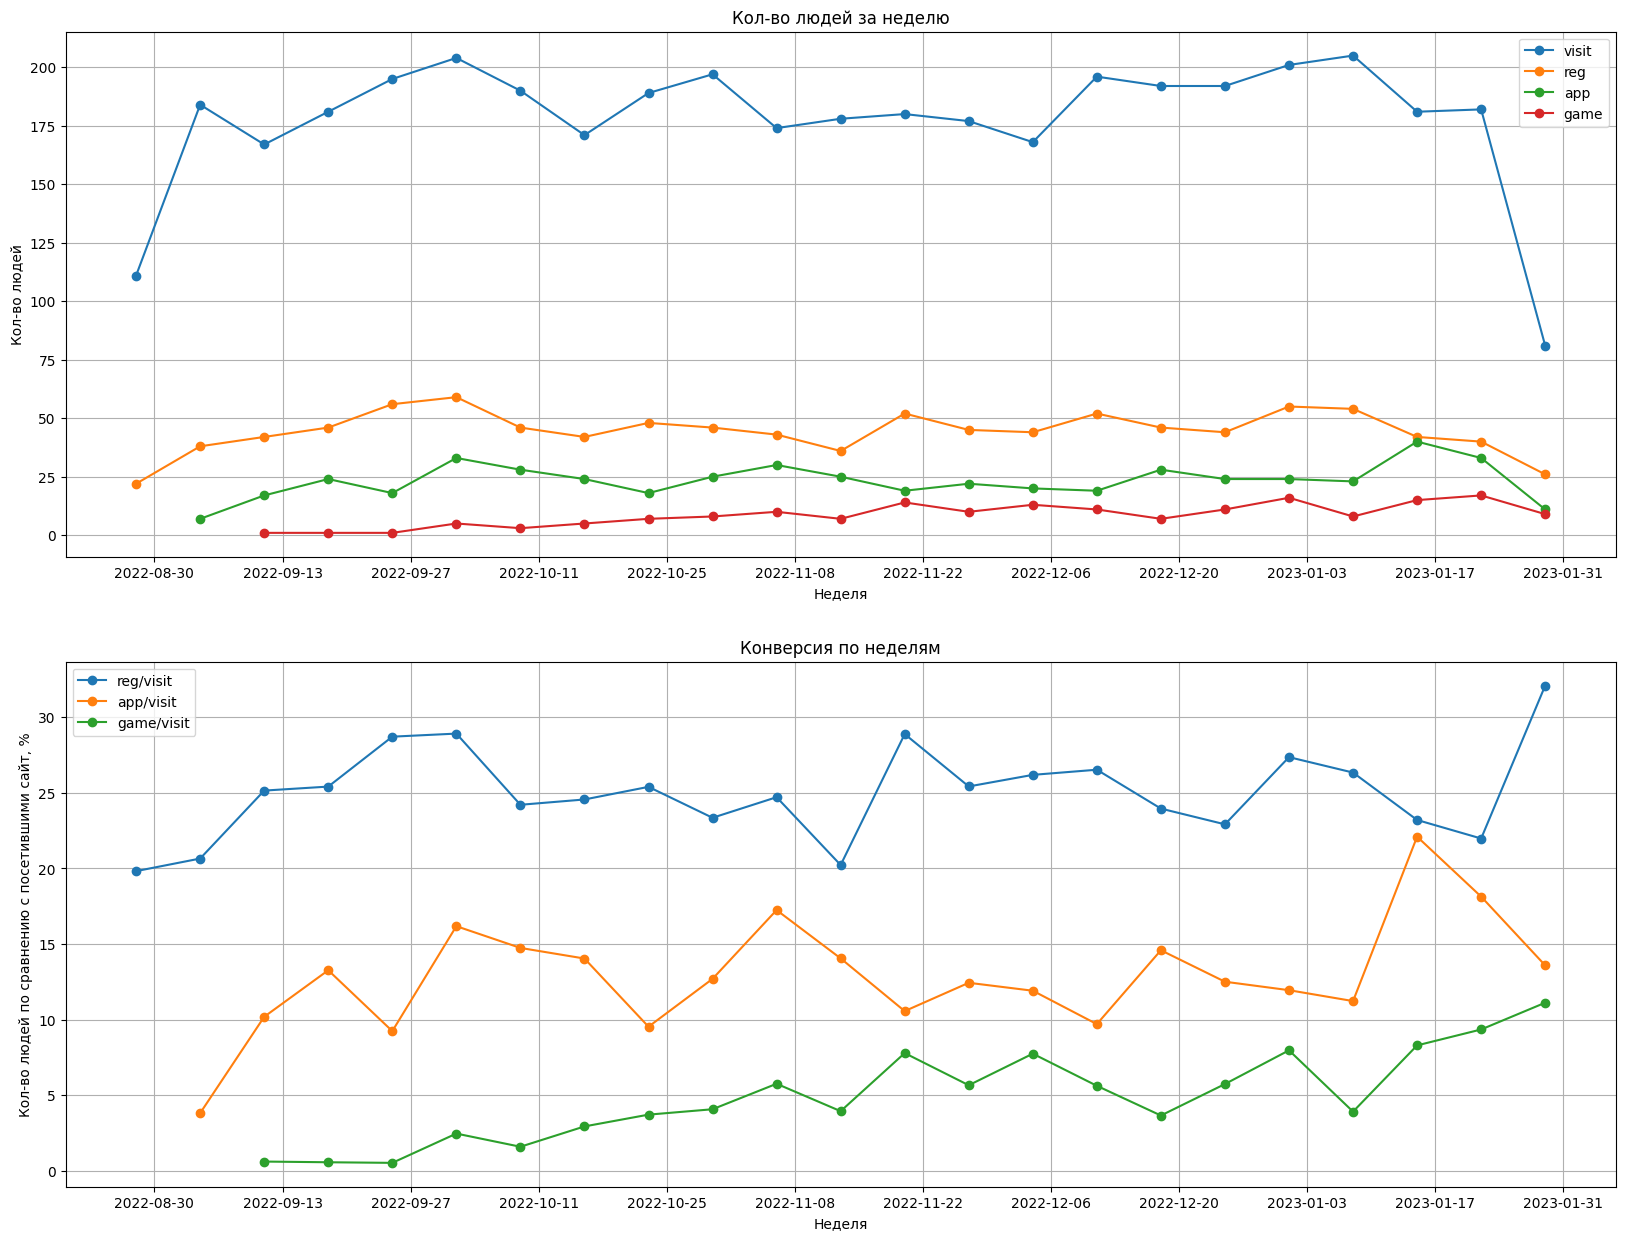

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(20,15))
ax[0].set_xticks(reg_per_week.index)
ax[1].set_xticks(reg_per_week.index)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax[0].plot(visit_per_week.index, visit_per_week, marker='o', label='visit')
ax[0].plot(reg_per_week.index, reg_per_week, marker='o', label="reg")
ax[0].plot(app_per_week.index, app_per_week.iloc[:, 1].to_numpy(), marker='o', label="app")
ax[0].plot(game_per_week.index, game_per_week.iloc[:, 1].to_numpy(), marker='o', label="game")

ax[0].set_title("Кол-во людей за неделю")
ax[0].set(xlabel="Неделя", ylabel="Кол-во людей")
ax[0].legend()
ax[0].grid()

ax[1].plot(reg_per_week.index, reg_per_week / visit_per_week * 100, marker='o', label="reg/visit")
ax[1].plot(app_per_week.index, np.diag(app_per_week.iloc[:, 1].to_numpy() / visit_per_week.iloc[1:, :].to_numpy()) * 100, marker='o', label="app/visit")
ax[1].plot(game_per_week.index, np.diag(game_per_week.iloc[:, 1].to_numpy() / visit_per_week.iloc[2:, :].to_numpy()) * 100, marker='o', label="game/visit")

ax[1].set_title("Конверсия по неделям")
ax[1].set(xlabel="Неделя", ylabel="Кол-во людей по сравнению с посетившими сайт, %")
ax[1].legend()
ax[1].grid()

plt.show()

#visit - кол-во людей, поситивших сайт
#reg - кол-во людей, зарегестрировавшихся на сайте
#app - кол-во людей, подавших заявку на игру
#game - кол-во людей, пришедших на игру
#переодичность графика - 2 недели